In [252]:
import numpy as np 
import pandas as pd 
import plotly as py
import vaex
import matplotlib.pyplot as plt
import plotly.express as px
import os
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [253]:
dfInicial = vaex.open("../Databases/companies/output_chunk-*.csv")

In [254]:
dfCountriesTotal = vaex.open("../DataSetExtractions/countriesTotal.csv")

In [255]:
print("We have the following data sets:")
print(dfInicial.describe())

We have the following data sets:
          Company name Company URL domain        Year founded Industry  \
data_type       string             string             float64   string   
count          7173427            7173431             3566444  6883423   
NA                   4                  0             3606987   290008   
mean                --                 --  2001.7466683901387       --   
std                 --                 --           20.966276       --   
min                 --                 --              1451.0       --   
max                 --                 --              2103.0       --   

          Size range Locality  Country Linkedin URL Current employee estimate  \
data_type     string   string   string       string                   float64   
count        7173425  4664601  4824220      7173431                   7173423   
NA                 6  2508830  2349211            0                         8   
mean              --       --       --           -

In [256]:
print("And so we built the following table:")
print(dfCountriesTotal.describe())

And so we built the following table:
          Country            Industry           mean_size          max_size
data_type  string               int64             float64           float64
count         238                 238                 238               238
NA              0                   0                   0                 0
mean           --  20269.831932773108  13.854589827263414  8503.39075630252
std            --       152493.217759           11.056162      29244.955429
min            --                   1                 0.0               0.0
max            --             2278866               112.4          274047.0


In [257]:
pandasDfCountriesTotal =  dfCountriesTotal.to_pandas_df()
print("Here's a sample of the data in the table:")
sample = dfCountriesTotal.head(3) 
countries = sample["Country"].tolist()
industries = sample["Industry"].tolist()
table = vaex.from_arrays(countries = countries, industries = industries)
print(table)

Here's a sample of the data in the table:
  #  countries         industries
  0  afghanistan              376
  1  united states        2278866
  2  united kingdom        511968


In [258]:
print('Countries with most industries, in number:')
maxInd = pandasDfCountriesTotal.nlargest(10, 'Industry')
countries = maxInd["Country"].tolist()
industries = maxInd["Industry"].tolist()
table = vaex.from_arrays(countries = countries, industries = industries)
print(table)

Countries with most industries, in number:
  #  countries         industries
  0  united states        2278866
  1  united kingdom        511968
  2  canada                186621
  3  india                 144444
  4  spain                 143941
  5  netherlands           136809
  6  germany               118575
  7  australia             117133
  8  france                114706
  9  italy                 109818


Wich in turn can be seen in the following graph


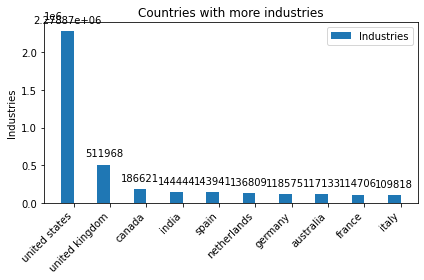

In [259]:
print("Wich in turn can be seen in the following graph")
labels = countries
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x - width/2, industries, width, label='Industries')
ax.set_ylabel('Industries')
ax.set_title('Countries with more industries')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.bar_label(rects, padding=6)
fig.tight_layout()

In [260]:
plt.show()

In [261]:
print('Now, we can see countries by the mean_size of industries, descrescent:')
meanInd = pandasDfCountriesTotal.nlargest(10, 'mean_size')
countries = meanInd["Country"].tolist()
mean_size = meanInd["mean_size"].tolist()
table = vaex.from_arrays(countries = countries, mean_size = mean_size)
print(table)

Now, we can see countries by the mean_size of industries, descrescent:
  #  countries           mean_size
  0  micronesia           112.4
  1  grenada               71.6
  2  south korea           48.8686
  3  american samoa        42.5
  4  liechtenstein         41.6615
  5  saudi arabia          40.3256
  6  montserrat            37
  7  qatar                 36.0189
  8  papua new guinea      35.3786
  9  switzerland           33.4152


Wich can generate the following view:


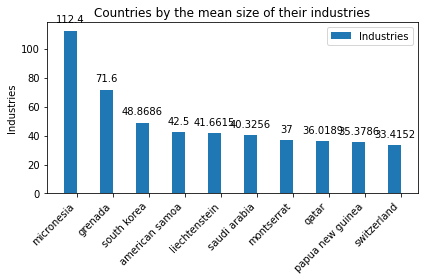

In [262]:
print("Wich can generate the following view:")
labels = countries
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x - width/2, mean_size, width, label='Industries')
ax.set_ylabel('Industries')
ax.set_title('Countries by the mean size of their industries')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.bar_label(rects, padding=6)
fig.tight_layout()

In [263]:
plt.show()

In [264]:
print('Now, we can see countries by the max_size of industries, descrescent:')
maxSizeInd = pandasDfCountriesTotal.nlargest(10, 'max_size')
countries = maxSizeInd["Country"].tolist()
max_size = maxSizeInd["max_size"].tolist()
table = vaex.from_arrays(countries = countries, max_size = max_size)
print(table)

Now, we can see countries by the max_size of industries, descrescent:
  #  countries         max_size
  0  united states       274047
  1  india               190771
  2  ireland             190689
  3  united kingdom      158363
  4  germany              87381
  5  finland              84327
  6  france               84218
  7  sweden               67692
  8  netherlands          60324
  9  switzerland          58538


Wich can generate the following view:


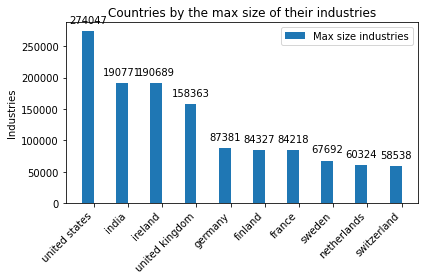

In [265]:
print("Wich can generate the following view:")
labels = countries
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x - width/2, max_size, width, label='Max size industries')
ax.set_ylabel('Industries')
ax.set_title('Countries by the max size of their industries')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.bar_label(rects, padding=6)
fig.tight_layout()

In [266]:
plt.show()

odo: prosseguir na descrição<br>


In [267]:
DfCountriesTotal = vaex.from_pandas(df=pandasDfCountriesTotal, copy_index=True)
df_countries = DfCountriesTotal["Country"].tolist()
Industries = DfCountriesTotal["Industry"].tolist()

In [268]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countries,
    locationmode = 'country names',
    z = Industries,
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

In [269]:
print('And here we can see the density of companies in the world:')
fig.show()

And here we can see the density of companies in the world:


In [270]:
print("Here we will see the same map, but removing united states and uk from the list:")

Here we will see the same map, but removing united states and uk from the list:


In [271]:
usaIndex = df_countries.index("united states")
Industries.remove(max(Industries))
Industries.remove(max(Industries))
df_countries.remove("united states")
df_countries.remove("united kingdom")

In [272]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countries,
    locationmode = 'country names',
    z = Industries,
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

In [273]:
fig.show()
#fig.update_layout(
#    title_text = 'Confirmed Cases as of March 28, 2020',
#    title_x = 0.5,
#    geo=dict(
#        showframe = False,
#        showcoastlines = False,
#        projection_type = 'equirectangular'
#3    )
#)

f_countrydate = df[df['Confirmed']>0]<br>
f_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()<br>
f_countrydate

ig = px.choropleth(df_countrydate, <br>
                   locations="Country", <br>
                   locationmode = "country names",<br>
                   color="Confirmed", <br>
                   hover_name="Country", <br>
                   animation_frame="Date"<br>
                  )<br>
ig.update_layout(<br>
   title_text = 'Global Spread of Coronavirus',<br>
   title_x = 0.5,<br>
   geo=dict(<br>
       showframe = False,<br>
       showcoastlines = False,<br>
   ))

In [274]:
    
#fig.show()